In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 4)

from modules.helpers import parseMatrixRows, parseMatrixColumns, parseMatrixIndexes
from modules.plot import highlightNotZero, plotSchema

from modules.model import BarProps
from modules.model import Point, Bar
from modules.matrices import LoadMatrix, BarMatrices, modelMatrix
from modules.internalForces import *

# Vstupy

In [2]:
crossSection = {"width": 200, "height": 300}
material = "C30/37"
barProps = BarProps(material, crossSection)
print(f'E = {barProps.E} kPa \nI = {barProps.I} m-4\nA = {barProps.A} m2')

E = 33000000.0 kPa 
I = 0.00044999999999999993 m-4
A = 0.06 m2


**Definovanie bodov**

In [3]:
p1 = Point(0,0, "bod 1", [0,1,2])
p2 = Point(0,5, "bod 2", [3,4,5])
p3 = Point(5,5, "bod 3", [6,7,8])
p4 = Point(5,2, "bod 4", [9,10,11])
p1.stiff #votknutie v bode 1
p4.hinge #klbova podpera v bode 4
print(f'p1 = {p1}\n p2 = {p2}\n p3 = {p3}\n p4 = {p4}')


p1 = Point(x=0, y=0, name='bod 1', codeNumbers=[0, 1, 2], dof=[0, 0, 0])
 p2 = Point(x=0, y=5, name='bod 2', codeNumbers=[3, 4, 5], dof=[1, 1, 1])
 p3 = Point(x=5, y=5, name='bod 3', codeNumbers=[6, 7, 8], dof=[1, 1, 1])
 p4 = Point(x=5, y=2, name='bod 4', codeNumbers=[9, 10, 11], dof=[0, 0, 1])


**Definovanie prútov**

In [4]:
bar12 = Bar(p1, p2)
bar23 = Bar(p2, p3)
bar34 = Bar(p3, p4)
print(f'bar12 = {bar12.len} m \nbar23 = {bar23.len} m\nbar34 = {bar34.len} m')

bar12 = 5.0 m 
bar23 = 5.0 m
bar34 = 3.0 m


**Definovanie síl**

In [5]:
F = 10 #kN
Q = 5 #kN/m
load_bar12 = Load(Q = Q, bar=bar12)
load_bar23 = Load(F = F, F_position=0.5, bar=bar23)
load_bar34 = Load(Q=0, F=0, bar=bar34)

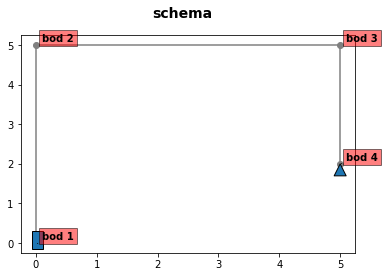

In [6]:
plotSchema([p1,p2,p3,p4])

In [7]:
def barSolution(bar, barProps, load):
    # print bar geometry
    [lx, ly] = bar.l_xy
    alfa = bar.angle
    print(f'bar properties \nalfa = {alfa} deg')
    print(f'lx = {lx}\nly = {ly}')

    # print stiffness matrix
    bar_matrices = BarMatrices(barProps, bar)
    A0 = bar_matrices.rotation
    B0 = bar_matrices.transmission
    k = bar_matrices.gss_stiffness
    k = parseMatrixIndexes(k, bar.codeNumbers)
    print('------------------------')
    print(
        f'stiffness matrix \n{k}\n rotation matrix \n{A0}\n transmission matrix \n{B0}')

    # calculate primary internal forces
    IntF = InternalForces_primary(load, bar)

    # print load vector
    FA_l = LoadMatrix.lss(0, IntF.Va, IntF.Ma)
    FB_l = LoadMatrix.lss(0, IntF.Vb, IntF.Mb)
    FA_g = LoadMatrix.gss(FA_l, A0.T)
    FB_g = LoadMatrix.gss(FB_l, A0.T)

    F = LoadMatrix.super(FA_g, FB_g)
    F = parseMatrixRows(F, bar.codeNumbers)
    print('------------------------')
    print(f'load vector \n{F}')

    toReturn = {
        "bar" : bar,
        "barProps": barProps,
        "lx" : lx,
        "ly" : ly,
        "alfa" : alfa,
        "A0" : A0,
        "B0" : B0,
        "k" : k,
        "F" : F,
        "FA_g" : FA_g,
        "FB_g" : FB_g,
    }
    return toReturn


**Riešenie na prúte 1-2**

In [8]:
bar12_Solution = barSolution(bar12, barProps, load_bar12)

bar properties 
alfa = -90.0 deg
lx = 0
ly = -5
------------------------
stiffness matrix 
            0           1           2           3           4           5
0  1.4256e+03 -2.4161e-11  3.5640e+03 -1.4256e+03  2.4161e-11  3.5640e+03
1 -2.4161e-11  3.9600e+05  2.1823e-13  2.4161e-11 -3.9600e+05 -1.2102e-10
2  3.5640e+03  2.1823e-13  1.1880e+04 -3.5640e+03 -2.1823e-13  5.9400e+03
3 -1.4256e+03  2.4161e-11 -3.5640e+03  1.4256e+03 -2.4161e-11 -3.5640e+03
4  2.4161e-11 -3.9600e+05 -2.1823e-13 -2.4161e-11  3.9600e+05  1.2102e-10
5  3.5640e+03 -1.2102e-10  5.9400e+03 -3.5640e+03  1.2102e-10  1.1880e+04
 rotation matrix 
            0           1  2
0  6.1232e-17 -1.0000e+00  0
1  1.0000e+00  6.1232e-17  0
2  0.0000e+00  0.0000e+00  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2  5  0 -1
------------------------
load vector 
            0
0 -1.2500e+01
1 -7.6540e-16
2 -1.0417e+01
3 -1.2500e+01
4 -7.6540e-16
5  1.0417e+01


**Riešenie na prúte 2-3**

In [9]:
bar23_Solution = barSolution(bar23,barProps, load_bar23)

bar properties 
alfa = 0.0 deg
lx = 5
ly = 0
------------------------
stiffness matrix 
          3       4        5         6       7        8
3  396000.0     0.0      0.0 -396000.0     0.0      0.0
4       0.0  1425.6   3564.0       0.0 -1425.6   3564.0
5       0.0  3564.0  11880.0       0.0 -3564.0   5940.0
6 -396000.0     0.0      0.0  396000.0     0.0      0.0
7       0.0 -1425.6  -3564.0       0.0  1425.6  -3564.0
8       0.0  3564.0   5940.0       0.0 -3564.0  11880.0
 rotation matrix 
     0    1  2
0  1.0  0.0  0
1 -0.0  1.0  0
2  0.0  0.0  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2  0  5 -1
------------------------
load vector 
      0
3  0.00
4 -5.00
5 -6.25
6  0.00
7 -5.00
8  6.25


**Riešenie na prúte 3-4**

In [10]:
bar34_Solution = barSolution(bar34, barProps, load_bar34)

bar properties 
alfa = 90.0 deg
lx = 0
ly = 3
------------------------
stiffness matrix 
            6           7           8           9           10          11
6   6.6000e+03  4.0009e-11 -9.9000e+03 -6.6000e+03 -4.0009e-11 -9.9000e+03
7   4.0009e-11  6.6000e+05  6.0620e-13 -4.0009e-11 -6.6000e+05 -1.2063e-10
8  -9.9000e+03  6.0620e-13  1.9800e+04  9.9000e+03 -6.0620e-13  9.9000e+03
9  -6.6000e+03 -4.0009e-11  9.9000e+03  6.6000e+03  4.0009e-11  9.9000e+03
10 -4.0009e-11 -6.6000e+05 -6.0620e-13  4.0009e-11  6.6000e+05  1.2063e-10
11 -9.9000e+03 -1.2063e-10  9.9000e+03  9.9000e+03  1.2063e-10  1.9800e+04
 rotation matrix 
            0           1  2
0  6.1232e-17  1.0000e+00  0
1 -1.0000e+00  6.1232e-17  0
2  0.0000e+00  0.0000e+00  1
 transmission matrix 
   0  1  2
0 -1  0  0
1  0 -1  0
2 -3  0 -1
------------------------
load vector 
      0
6   0.0
7   0.0
8   0.0
9   0.0
10  0.0
11  0.0


In [11]:
k1 = bar12_Solution['k']
k2 = bar23_Solution['k']
k3 = bar34_Solution['k']


In [12]:
modelMatrix = modelMatrix([k1,k2,k3])
modelMatrix.style\
.format('{:.2e}')\
.applymap(highlightNotZero)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.43e+03,-2.42e-11,3.56e+03,-1.43e+03,2.42e-11,3.56e+03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1,-2.42e-11,3.96e+05,2.18e-13,2.42e-11,-3.96e+05,-1.21e-10,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
2,3.56e+03,2.18e-13,1.19e+04,-3.56e+03,-2.18e-13,5.94e+03,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
3,-1.43e+03,2.42e-11,-3.56e+03,3.97e+05,-2.42e-11,-3.56e+03,-3.96e+05,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
4,2.42e-11,-3.96e+05,-2.18e-13,-2.42e-11,3.97e+05,3.56e+03,0.00e+00,-1.43e+03,3.56e+03,0.00e+00,0.00e+00,0.00e+00
5,3.56e+03,-1.21e-10,5.94e+03,-3.56e+03,3.56e+03,2.38e+04,0.00e+00,-3.56e+03,5.94e+03,0.00e+00,0.00e+00,0.00e+00
6,0.00e+00,0.00e+00,0.00e+00,-3.96e+05,0.00e+00,0.00e+00,4.03e+05,4.00e-11,-9.90e+03,-6.60e+03,-4.00e-11,-9.90e+03
7,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-1.43e+03,-3.56e+03,4.00e-11,6.61e+05,-3.56e+03,-4.00e-11,-6.60e+05,-1.21e-10
8,0.00e+00,0.00e+00,0.00e+00,0.00e+00,3.56e+03,5.94e+03,-9.90e+03,-3.56e+03,3.17e+04,9.90e+03,-6.06e-13,9.90e+03
9,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-6.60e+03,-4.00e-11,9.90e+03,6.60e+03,4.00e-11,9.90e+03


In [13]:
def boundaryConditionsVector(points: list) -> list:
    dofList=[]
    for point in points:
        dofList.append(point.dof)
    return pd.DataFrame(np.array(dofList).flatten())
    
def boundaryConditionsFilter(bc_vector, cond):
    bc = np.array(bc_vector).flatten()
    df = pd.DataFrame(bc)
    return df[df[0]==cond].index.values.astype(int)

def loadVector(F1,F2,F3):
    x = F1.add(F2,fill_value=0)
    return x.add(F3,fill_value=0)


In [14]:
F1 = bar12_Solution['F']
F2 = bar23_Solution['F']
F3 = bar34_Solution['F']


**Vektor zaťaženia**

In [15]:
loadVector = loadVector(F1,F2,F3)
loadVector

,0
0,-1.2500e+01
1,-7.6540e-16
2,-1.0417e+01
3,-1.2500e+01
4,-5.0000e+00
5,4.1667e+00
6,0.0000e+00
7,-5.0000e+00
8,6.2500e+00
9,0.0000e+00


In [16]:
bc_vector = boundaryConditionsVector([p1,p2,p3,p4])
bc_0 = boundaryConditionsFilter(bc_vector, 0)
loadVector.drop(bc_0, inplace=True)
loadVector

,0
3,-12.5000
4,-5.0000
5,4.1667
6,0.0000
7,-5.0000
8,6.2500
11,0.0000


**Matica tuhosti**

In [17]:
bc_1 = boundaryConditionsFilter(bc_vector, 1)
copyModelMatrix = modelMatrix.copy()
copyModelMatrix.drop(bc_0, inplace=True)
filteredModelMatrix = copyModelMatrix[bc_1]
parseMatrixIndexes(filteredModelMatrix.copy(), ["u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","fi[4]"])

,u[2],v[2],fi[2],u[3],v[3],fi[3],fi[4]
u[2],3.9743e+05,-2.4161e-11,-3564.0,-3.9600e+05,0.0000e+00,0.0,0.0000e+00
v[2],-2.4161e-11,3.9743e+05,3564.0,0.0000e+00,-1.4256e+03,3564.0,0.0000e+00
fi[2],-3.5640e+03,3.5640e+03,23760.0,0.0000e+00,-3.5640e+03,5940.0,0.0000e+00
u[3],-3.9600e+05,0.0000e+00,0.0,4.0260e+05,4.0009e-11,-9900.0,-9.9000e+03
v[3],0.0000e+00,-1.4256e+03,-3564.0,4.0009e-11,6.6143e+05,-3564.0,-1.2063e-10
fi[3],0.0000e+00,3.5640e+03,5940.0,-9.9000e+03,-3.5640e+03,31680.0,9.9000e+03
fi[4],0.0000e+00,0.0000e+00,0.0,-9.9000e+03,-1.2063e-10,9900.0,1.9800e+04


In [18]:
def nodeDisplacements(modelMatrix):
    inv = pd.DataFrame(np.linalg.inv(modelMatrix.values), modelMatrix.columns, modelMatrix.index)
    return inv.dot(loadVector)*-1

**Deformácie**

In [19]:
displacements = nodeDisplacements(filteredModelMatrix)
parseMatrixRows(displacements.copy(), ["u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","fi[4]"])

,0
u[2],5.8585e-03
v[2],1.3700e-06
fi[2],5.2184e-04
u[3],5.8433e-03
v[3],1.4330e-05
fi[3],7.3404e-04
fi[4],2.5546e-03


In [20]:
def modelDisplacements(displacements):
     return pd.DataFrame(np.zeros((12, 1))).add(displacements, fill_value=0)

In [21]:
modelDisplacements = modelDisplacements(displacements)
rows = ["u[1]", "v[1]", "fi[1]","u[2]", "v[2]", "fi[2]","u[3]", "v[3]", "fi[3]","u[4]", "v[4]", "fi[4]"]
parseMatrixRows(modelDisplacements.copy(), rows)

,0
u[1],0.0000e+00
v[1],0.0000e+00
fi[1],0.0000e+00
u[2],5.8585e-03
v[2],1.3700e-06
fi[2],5.2184e-04
u[3],5.8433e-03
v[3],1.4330e-05
fi[3],7.3404e-04
u[4],0.0000e+00


In [22]:
# calculate internal forces by formula --- F = F' + k * delta
def barInternalForces(modelDisplacements, barSolution):

    bar = barSolution["bar"]
    barProps = barSolution["barProps"]

    # get bar displacements (delta)
    delta_1 = modelDisplacements.loc[bar.codeNumbers[0]:bar.codeNumbers[2]]
    delta_2 = modelDisplacements.loc[bar.codeNumbers[3]:bar.codeNumbers[5]]
    deltaBar = pd.concat([delta_1, delta_2])

    
    # get bar matrices
    A0 = barSolution["A0"]
    k = barSolution["k"]

    # u = k * delta
    u = k.dot(deltaBar)

    # F' --- node A
    A0_A_parsed = parseMatrixIndexes(A0, bar.codeNumbers[0:3])
    FA_g = barSolution["FA_g"]
    F_A_g_parsed = parseMatrixRows(FA_g, bar.codeNumbers[0:3])

    # F' --- node B
    A0_B_parsed = parseMatrixIndexes(A0, bar.codeNumbers[3:6])
    FB_g = barSolution["FB_g"]
    F_B_g_parsed = parseMatrixRows(FB_g, bar.codeNumbers[3:6])


    # F' + u --- node A
    local = u.loc[bar.codeNumbers[0]:bar.codeNumbers[2]]+F_A_g_parsed
    F1 = A0_A_parsed.T.dot(local)
    forces_AB = parseMatrixRows(F1, ["N","V","M"])

    # F' + u --- node B
    local = u.loc[bar.codeNumbers[3]:bar.codeNumbers[5]]+F_B_g_parsed
    F2 = A0_B_parsed.dot(local)
    forces_BA = parseMatrixRows(F2, ["N","V","M"])

    forces = pd.concat([forces_AB, forces_BA], axis=1)
    print(parseMatrixColumns(forces, [bar.point_a.name, bar.point_b.name]))
    return forces

    


## Vnútorné sily

In [23]:
forces12 = barInternalForces(modelDisplacements, bar12_Solution)

     bod 1   bod 2
N  -0.5425 -0.5425
V  18.9920 -6.0080
M -28.1966 -4.2635


In [24]:
forces23 = barInternalForces(modelDisplacements, bar23_Solution)

    bod 2    bod 3
N  6.0080  -6.0080
V -0.5425  -9.4575
M  4.2635  18.0239


In [25]:
forces34 = barInternalForces(modelDisplacements, bar34_Solution)

     bod 3       bod 4
N  -9.4575 -9.4575e+00
V   6.0080  6.0080e+00
M -18.0239 -3.0314e-15


In [26]:
forces_final = pd.concat([forces12, forces23, forces34], axis=1)
forces_final

,bod 1,bod 2,bod 2,bod 3,bod 3,bod 4
N,-0.5425,-0.5425,6.0080,-6.0080,-9.4575,-9.4575e+00
V,18.9920,-6.0080,-0.5425,-9.4575,6.0080,6.0080e+00
M,-28.1966,-4.2635,4.2635,18.0239,-18.0239,-3.0314e-15


<img src="./assets/N.jpg" alt="drawing" width="500"/>
<img src="./assets/V.jpg" alt="drawing" width="500"/>
<img src="./assets/M.jpg" alt="drawing" width="500"/>